# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'USDCAD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

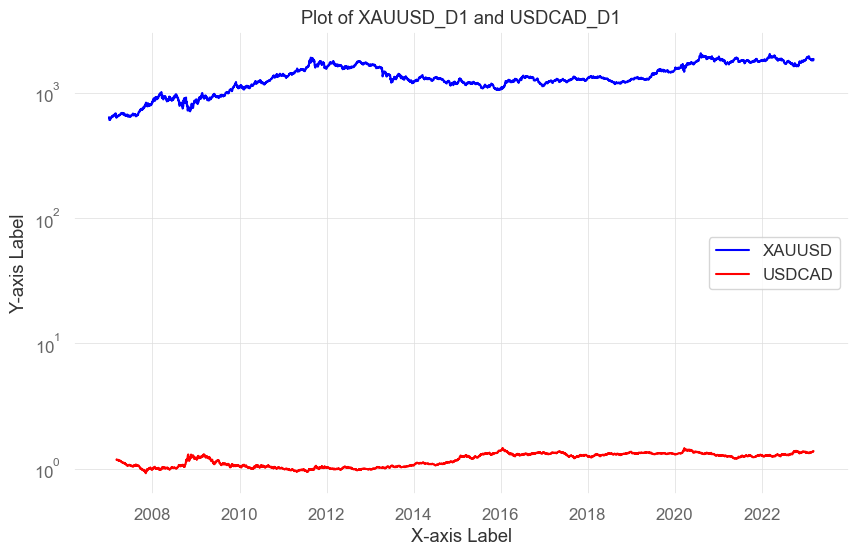

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                          8.203e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:28:05   Log-Likelihood:                         -36156.
No. Observations:                5003   AIC:                                  7.231e+04
Df Residuals:                    5002   BIC:                                  7.232e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1134.7512      3.962    286.416      0.000    1126.984    1142.518
==============================================================================
Omnibus:                     1045.937   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.815
Skew:                           0.142   Prob(JB):                     5.03e-48
Kurtosis:                       2.018   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run()

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.887363
Multiple (Buy-and-Hold):     3.702206
--------------------------------------
Out-/Underperformance:       -2.814843


CAGR:                        -0.007446
Annualized Mean:             -0.007474
Annualized Std:              0.031288
Sharpe Ratio:                -0.238876
Sortino Ratio:               -0.325581
Maximum Drawdown:            0.166564
Calmar Ratio:                -0.044704
Max Drawdown Duration:       5238 Days
Kelly Criterion:             -7.140366


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -11.96%
CAGR﹪                     -0.55%

Sharpe                     -0.21
Prob. Sharpe Ratio         16.91%
Smart Sharpe               -0.21
Sortino                    -0.29
Smart Sortino              -0.29
Sortino/√2                 -0.21
Smart Sortino/√2           -0.21
Omega                      0.96

Max Drawdown               -17.02%
Longest DD Days            5238
Volatility (ann.)          2.81%
Calmar                     -0.03
Skew                       -0.41
Kurtosis                   5.29

Expected Daily %           -0.0%
Expected Monthly %         -0.07%
Expected Yearly %          -0.75%
Kelly Criterion            -2.03%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.29%
Expected Shortfall (cVaR)  -0.29%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-28,2018-04-19,2023-03-01,5238,-17.019623,-16.370986
2,2007-03-15,2008-03-16,2008-10-21,587,-5.583518,-5.286282
3,2008-10-23,2008-10-23,2008-10-23,1,-0.113891,NaN
4,2008-10-26,2008-10-26,2008-10-26,1,-0.110400,NaN
5,2007-03-08,2007-03-12,2007-03-12,5,-0.083347,-0.078188


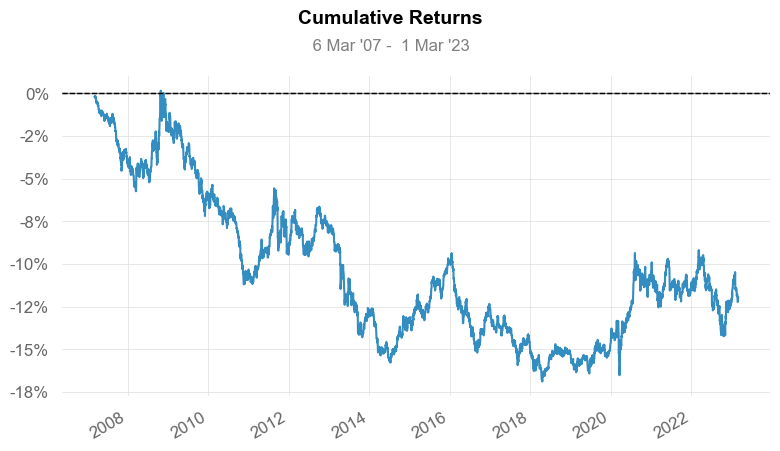

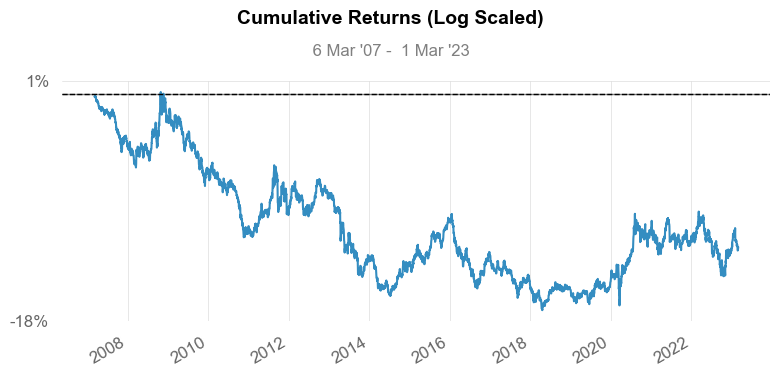

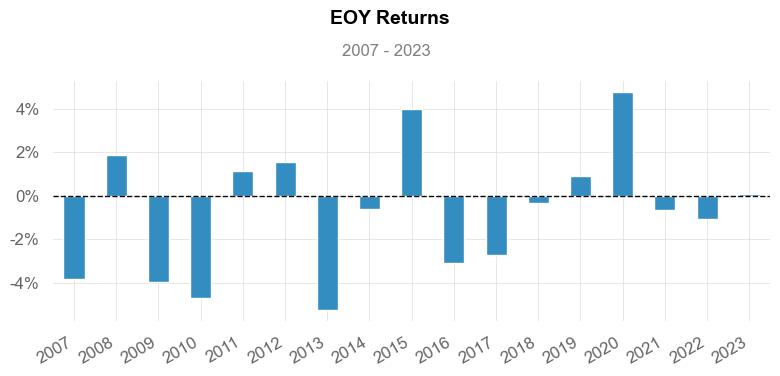

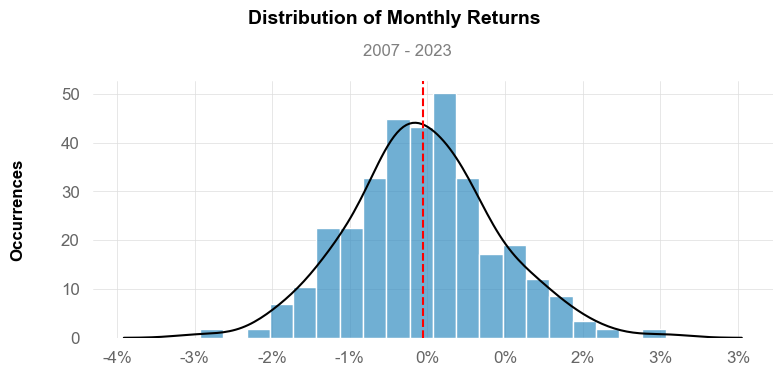

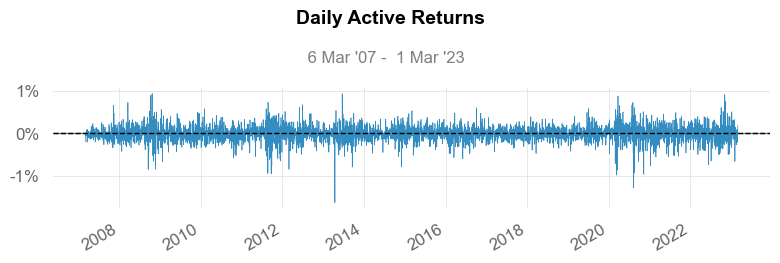

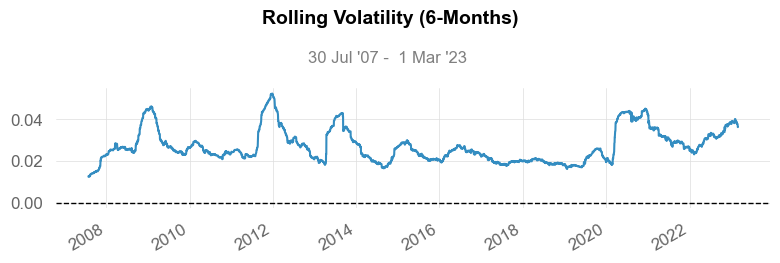

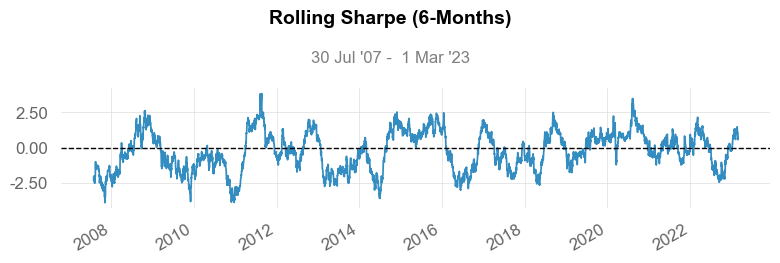

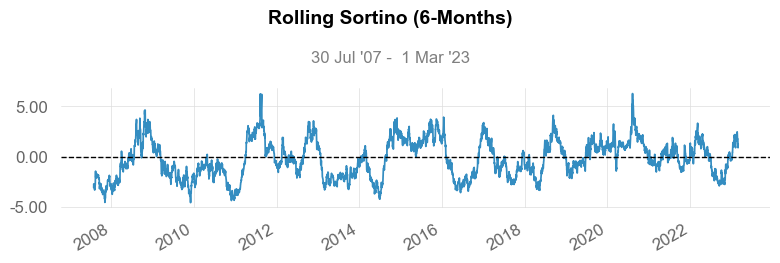

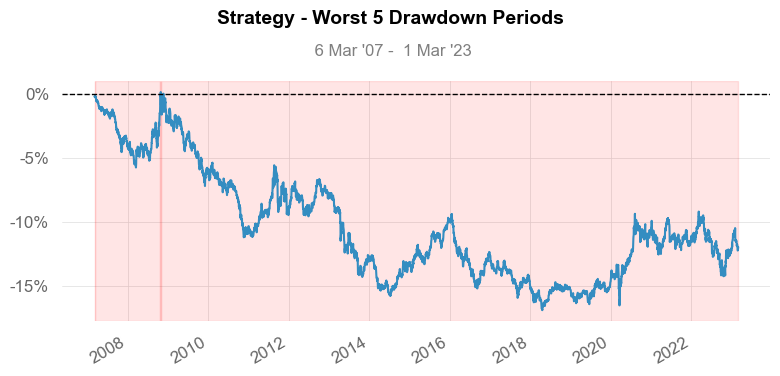

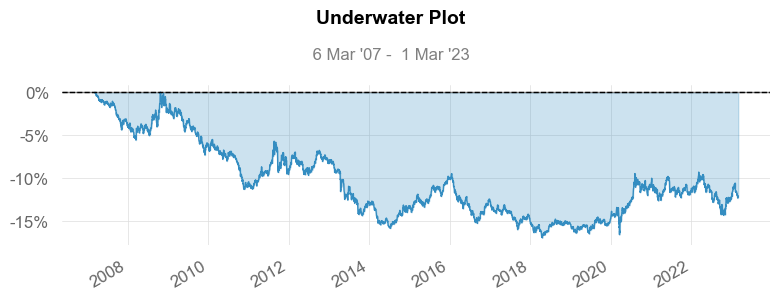

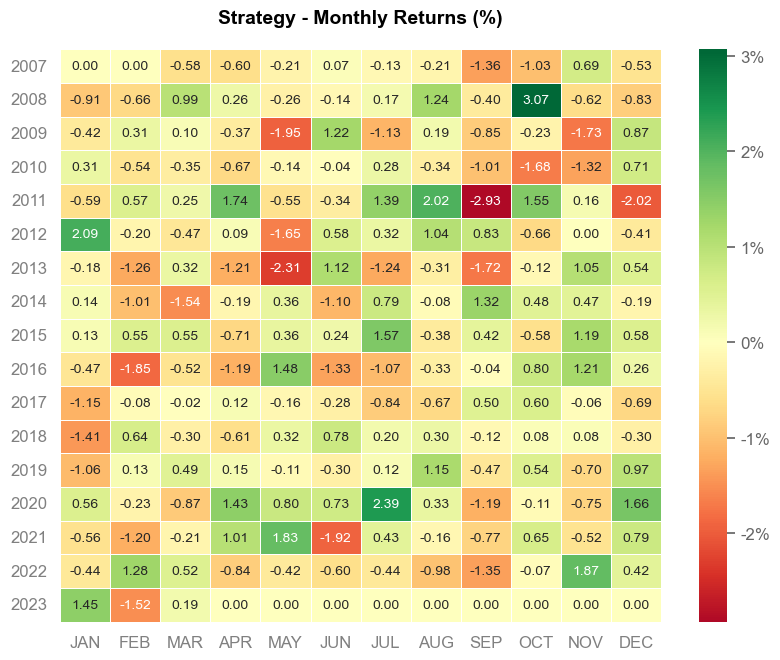

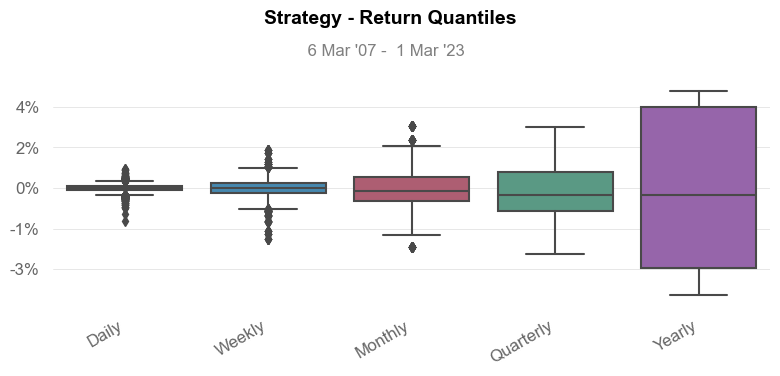

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

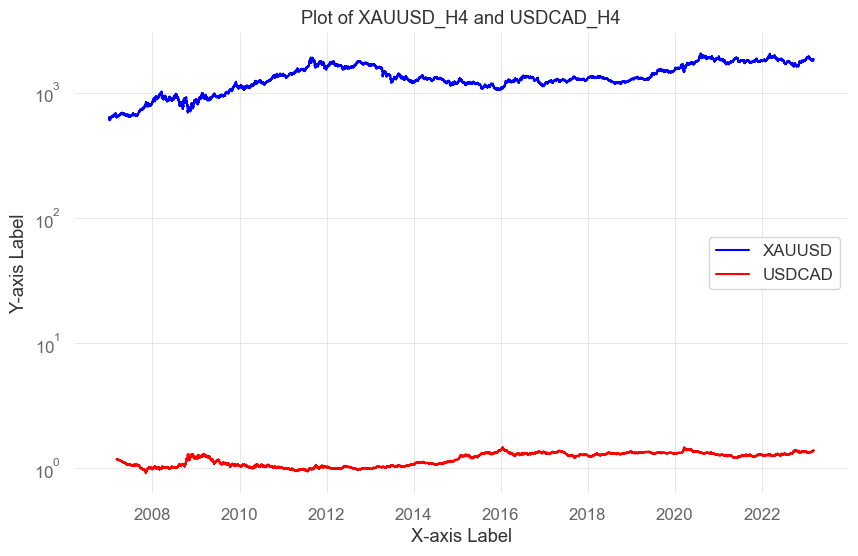

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          4.225e+05
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:28:42   Log-Likelihood:                     -1.8649e+05
No. Observations:               25803   AIC:                                  3.730e+05
Df Residuals:                   25802   BIC:                                  3.730e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1134.5636      1.745    650.033      0.000    1131.143    1137.985
==============================================================================
Omnibus:                     5460.235   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1121.076
Skew:                           0.140   Prob(JB):                    3.64e-244
Kurtosis:                       2.018   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run()

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.896862
Multiple (Buy-and-Hold):     3.652704
--------------------------------------
Out-/Underperformance:       -2.755842


CAGR:                        -0.006785
Annualized Mean:             -0.006808
Annualized Std:              0.030764
Sharpe Ratio:                -0.221301
Sortino Ratio:               -0.306234
Maximum Drawdown:            0.157565
Calmar Ratio:                -0.043061
Max Drawdown Duration:       5241 Days
Kelly Criterion:             -6.69538


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -11.07%
CAGR﹪                     -0.51%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.81%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -15.97%
Longest DD Days            5238
Volatility (ann.)          2.79%
Calmar                     -0.03
Skew                       -0.4
Kurtosis                   5.34

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.69%
Kelly Criterion            -1.87%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.29%
Expected Shortfall (cVaR)  -0.29%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-28,2018-04-19,2023-03-01,5238,-15.969979,-15.327853
2,2007-03-15,2008-03-16,2008-10-21,587,-5.578459,-5.281492
3,2008-10-23,2008-10-23,2008-10-23,1,-0.113788,NaN
4,2008-10-26,2008-10-26,2008-10-26,1,-0.110300,NaN
5,2007-03-08,2007-03-12,2007-03-12,5,-0.083271,-0.078117


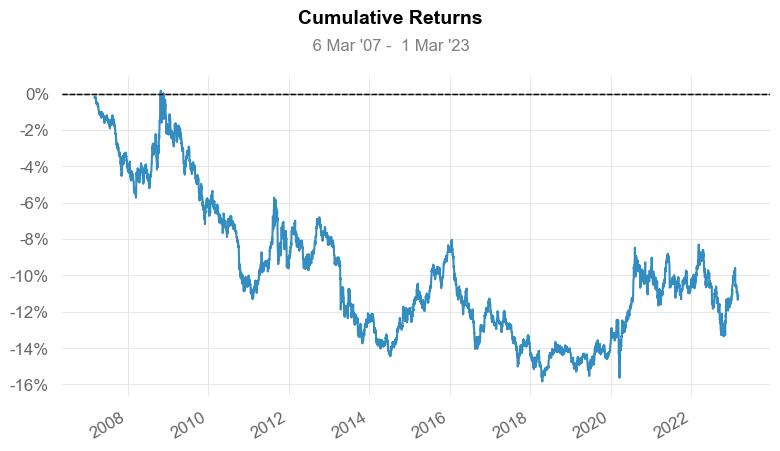

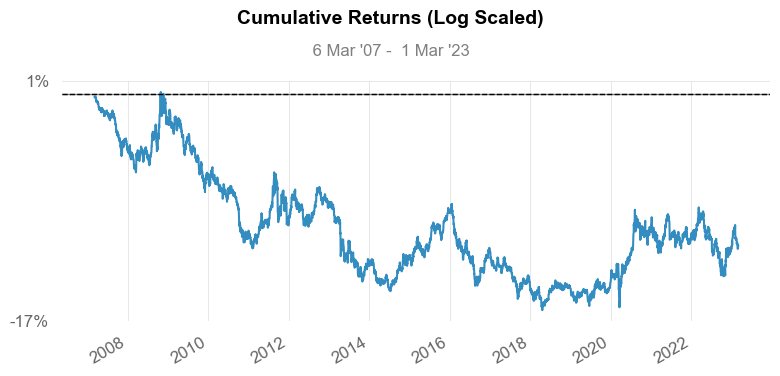

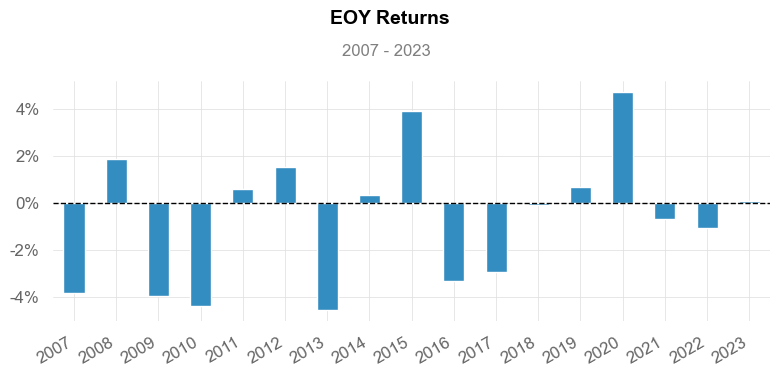

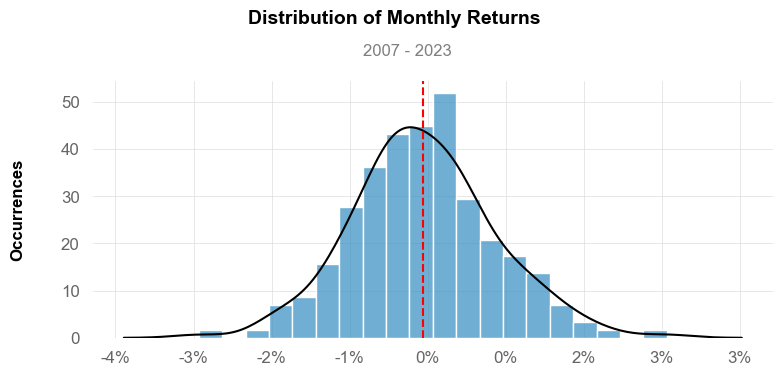

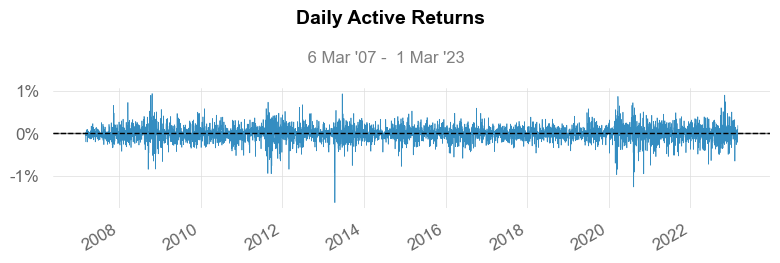

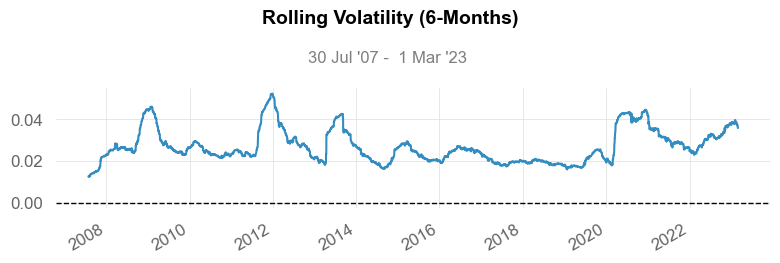

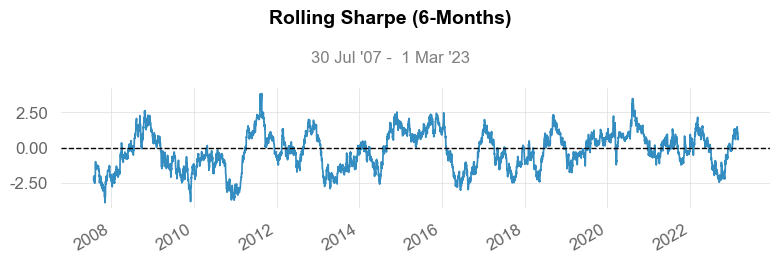

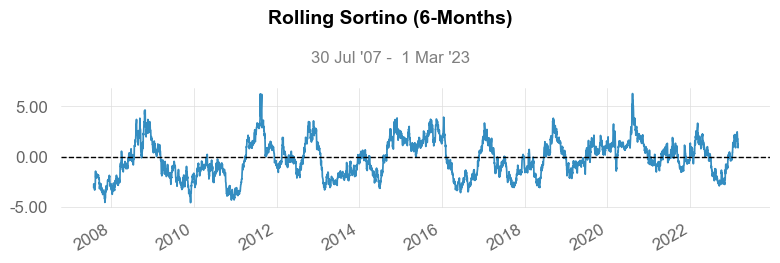

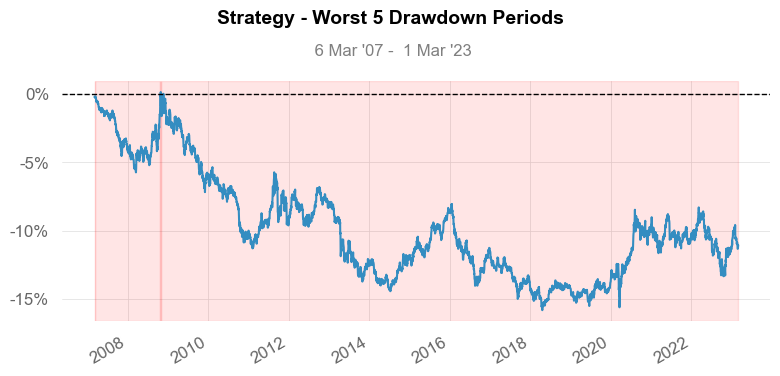

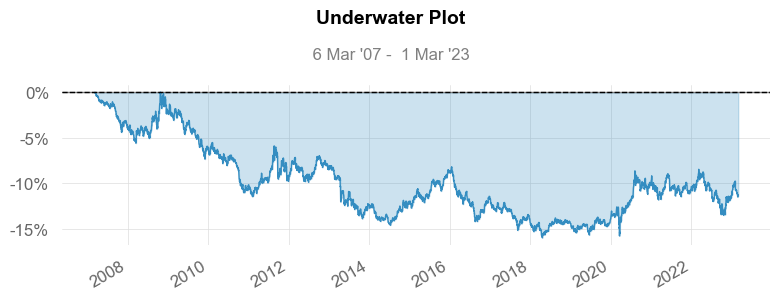

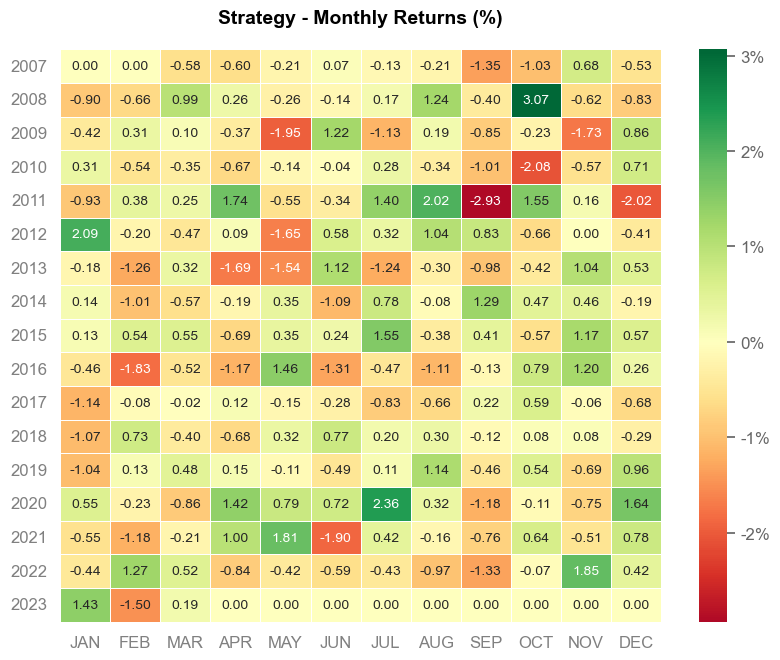

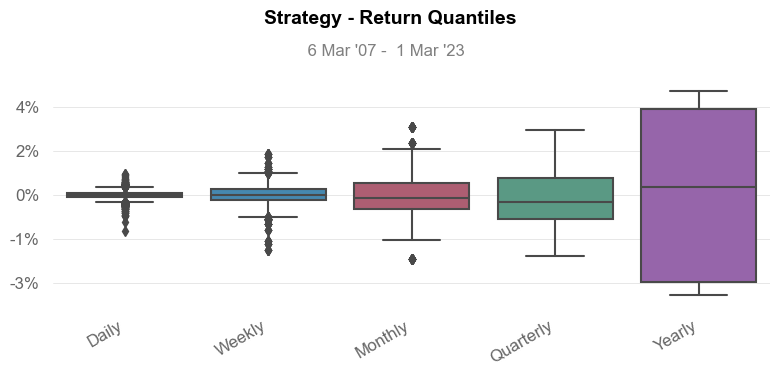

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

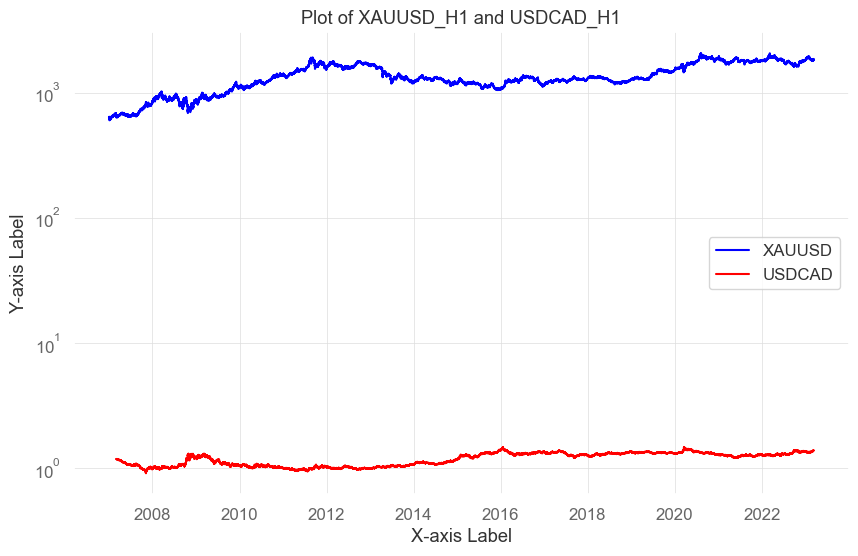

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.634e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:31:04   Log-Likelihood:                     -7.2164e+05
No. Observations:               99845   AIC:                                  1.443e+06
Df Residuals:                   99844   BIC:                                  1.443e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1134.4934      0.887   1278.440      0.000    1132.754    1136.233
==============================================================================
Omnibus:                    21227.064   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4339.741
Skew:                           0.139   Prob(JB):                         0.00
Kurtosis:                       2.017   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run()

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.42%
CAGR﹪                     -0.47%

Sharpe                     -0.19
Prob. Sharpe Ratio         20.34%
Smart Sharpe               -0.18
Sortino                    -0.25
Smart Sortino              -0.25
Sortino/√2                 -0.18
Smart Sortino/√2           -0.18
Omega                      0.97

Max Drawdown               -15.22%
Longest DD Days            5238
Volatility (ann.)          2.78%
Calmar                     -0.03
Skew                       -0.43
Kurtosis                   5.84

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.65%
Kelly Criterion            -1.75%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.29%
Expected Shortfall (cVaR)  -0.29%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-28,2018-04-19,2023-03-01,5238,-15.215029,-14.756689
2,2007-03-15,2008-03-16,2008-10-21,587,-5.576726,-5.279852
3,2008-10-23,2008-10-23,2008-10-23,1,-0.113753,NaN
4,2008-10-26,2008-10-26,2008-10-26,1,-0.110266,NaN
5,2007-03-08,2007-03-12,2007-03-12,5,-0.083246,-0.078093


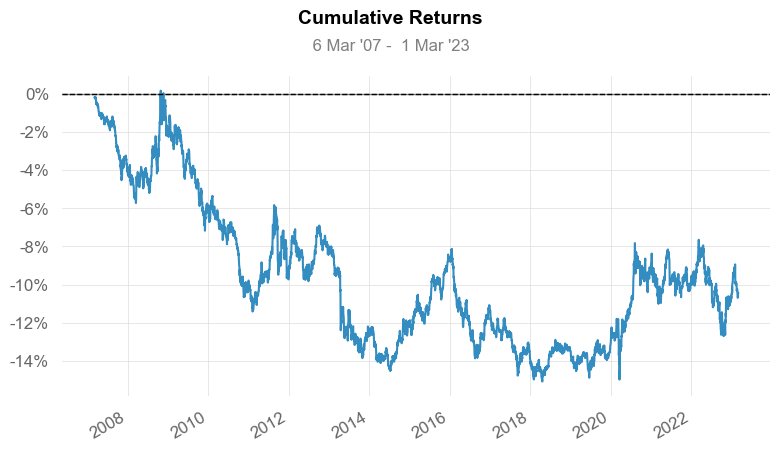

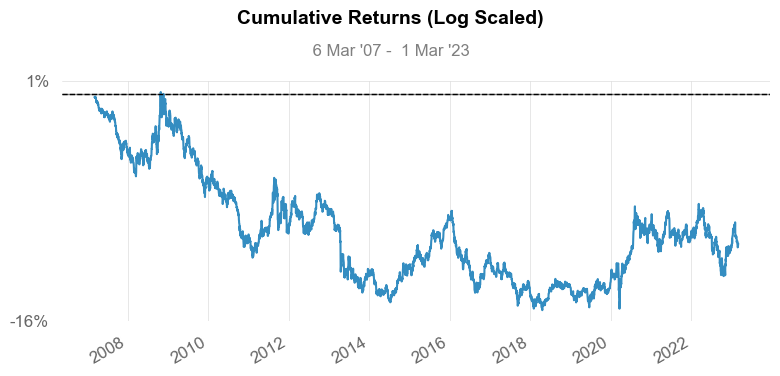

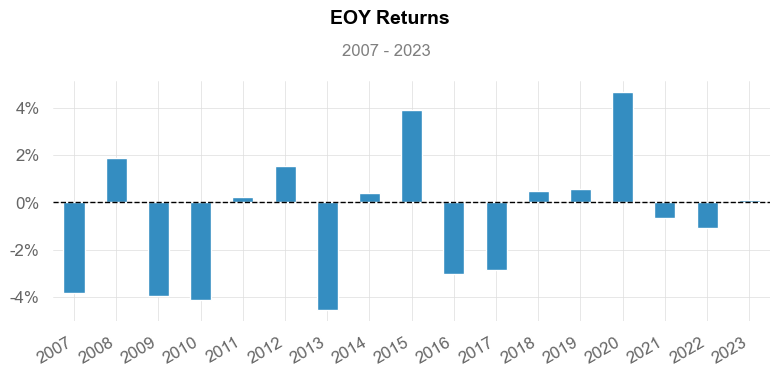

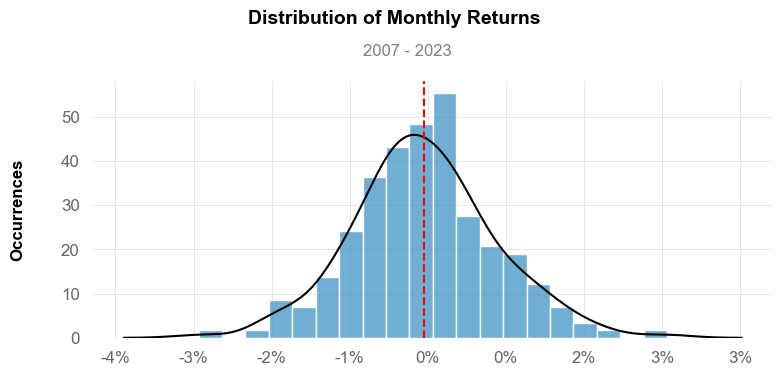

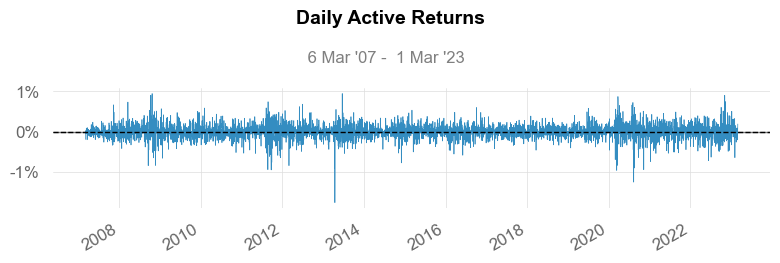

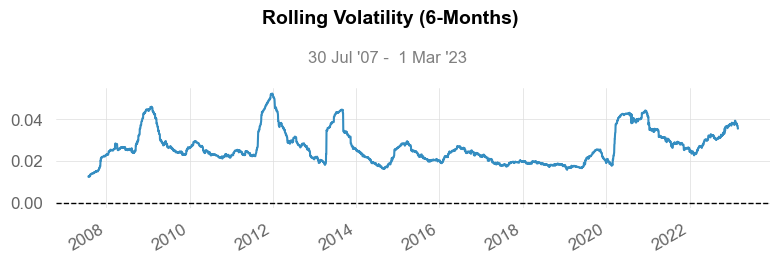

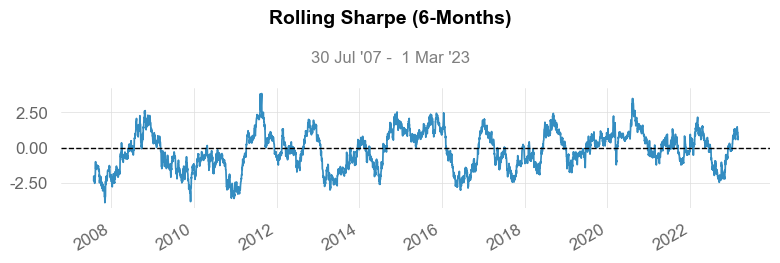

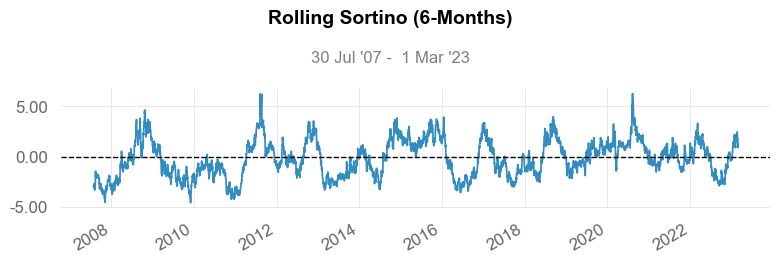

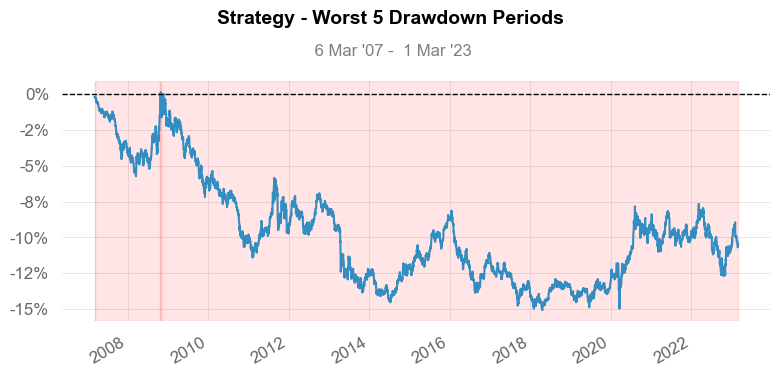

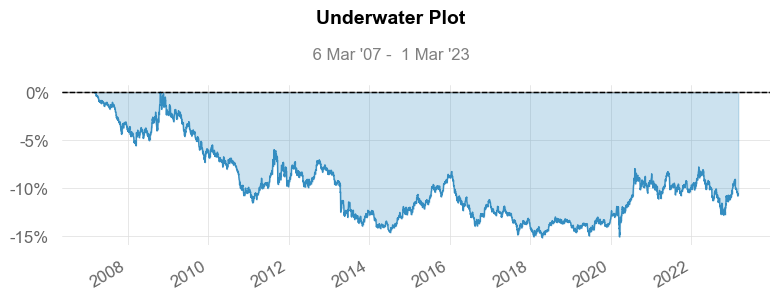

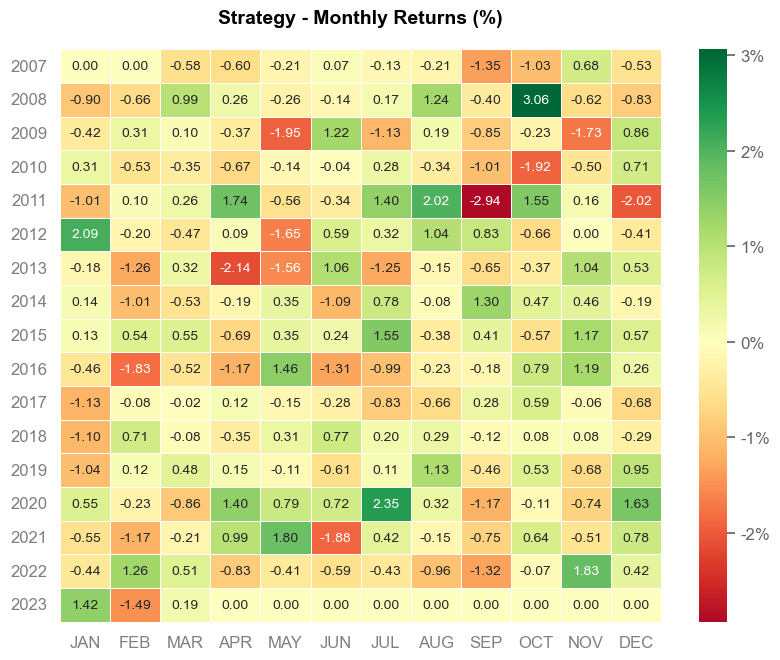

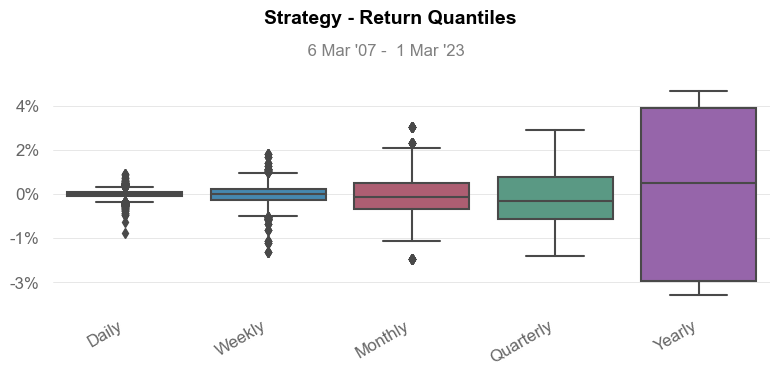

In [40]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

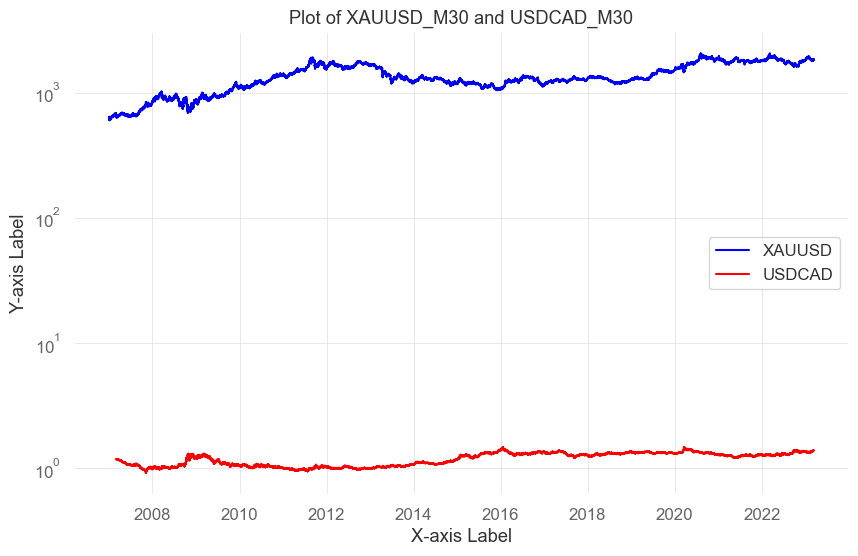

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label= 'XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          3.269e+06
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        09:36:48   Log-Likelihood:                     -1.4432e+06
No. Observations:              199676   AIC:                                  2.886e+06
Df Residuals:                  199675   BIC:                                  2.886e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close       1134.4934      0.627   1807.972      0.000    1133.263    1135.723
==============================================================================
Omnibus:                    42466.099   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8679.333
Skew:                           0.139   Prob(JB):                         0.00
Kurtosis:                       2.017   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run()

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2007-03-06
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -11.13%
CAGR﹪                     -0.51%

Sharpe                     -0.2
Prob. Sharpe Ratio         18.76%
Smart Sharpe               -0.2
Sortino                    -0.27
Smart Sortino              -0.27
Sortino/√2                 -0.19
Smart Sortino/√2           -0.19
Omega                      0.96

Max Drawdown               -16.03%
Longest DD Days            5238
Volatility (ann.)          2.8%
Calmar                     -0.03
Skew                       -0.49
Kurtosis                   6.61

Expected Daily %           -0.0%
Expected Monthly %         -0.06%
Expected Yearly %          -0.69%
Kelly Criterion            -1.88%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.29%
Expected Shortfall (cVaR)  -0.29%

Max Consecutive W

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-10-28,2018-04-18,2023-03-01,5238,-16.027061,-15.476608
2,2007-03-15,2008-03-16,2008-10-21,587,-5.576726,-5.279852
3,2008-10-23,2008-10-23,2008-10-23,1,-0.113753,NaN
4,2008-10-26,2008-10-26,2008-10-26,1,-0.110266,NaN
5,2007-03-08,2007-03-12,2007-03-12,5,-0.083246,-0.078093


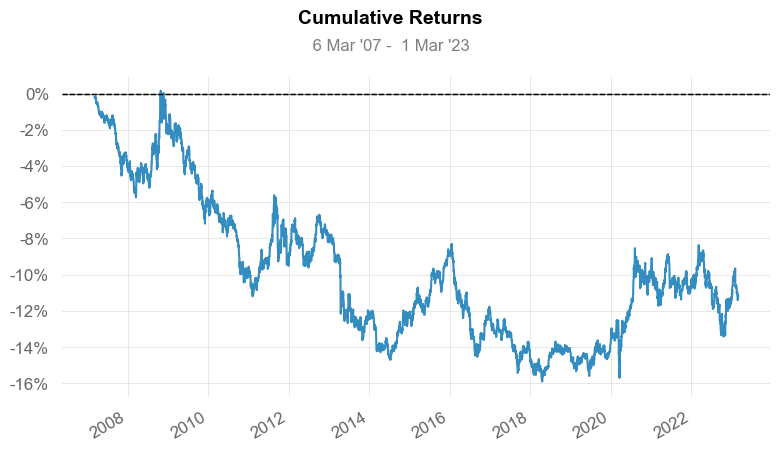

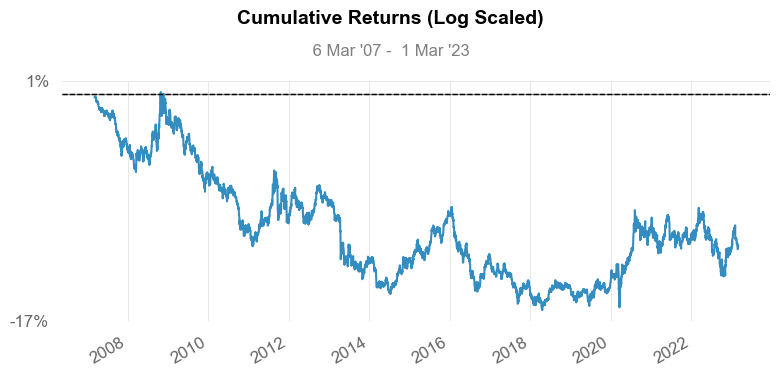

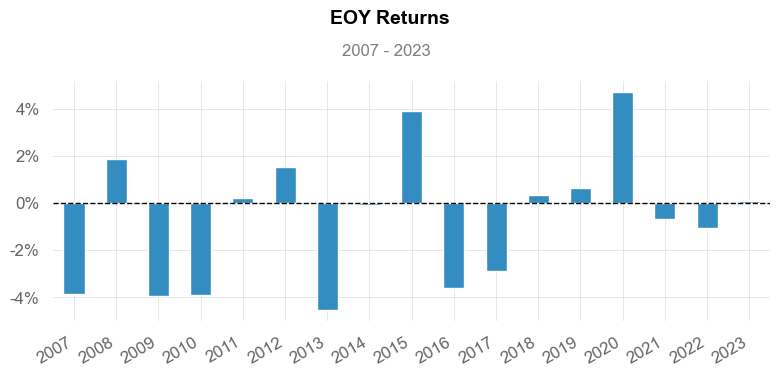

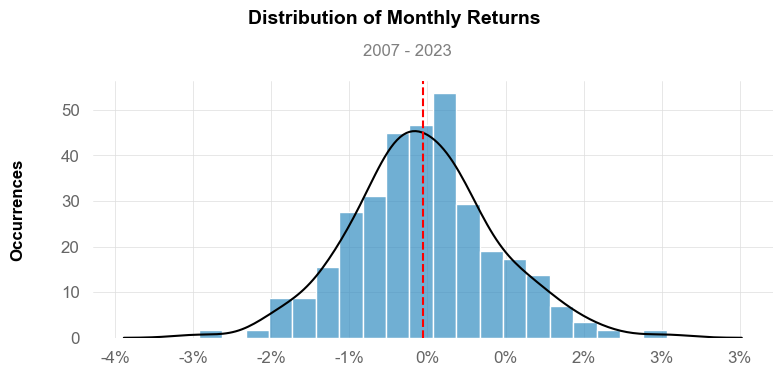

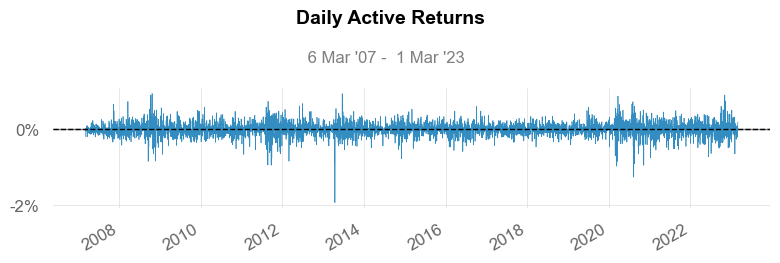

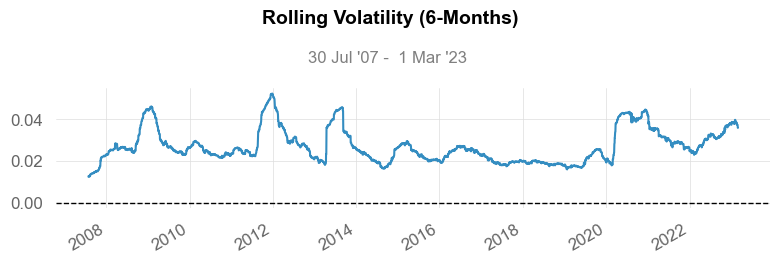

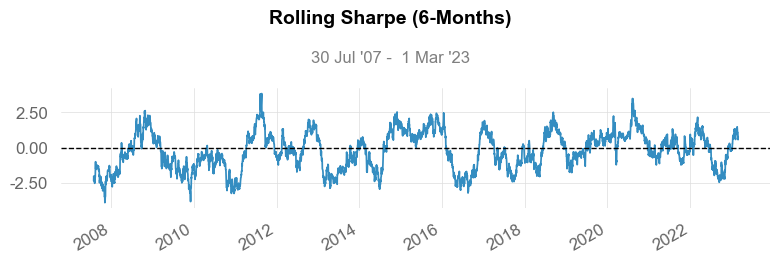

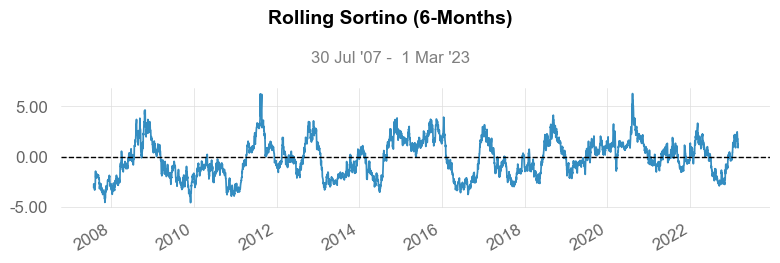

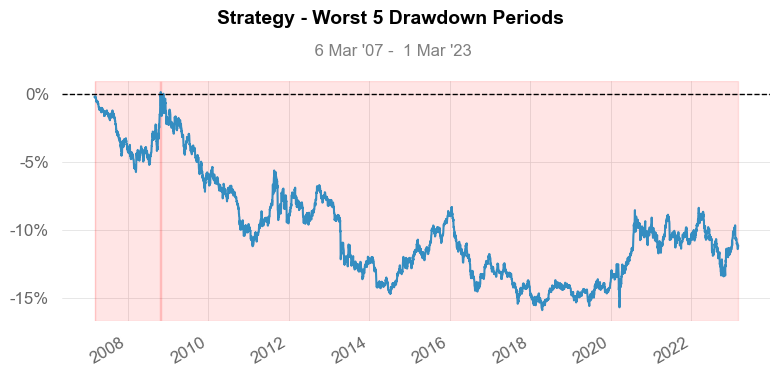

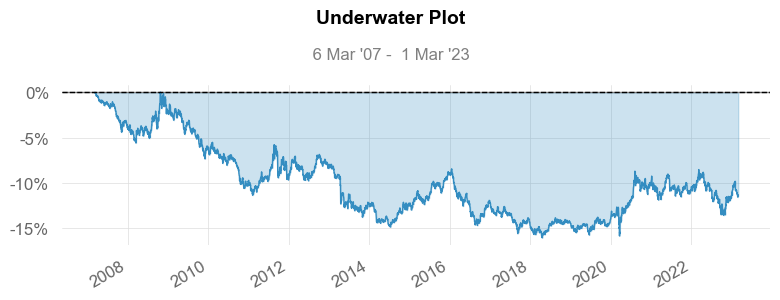

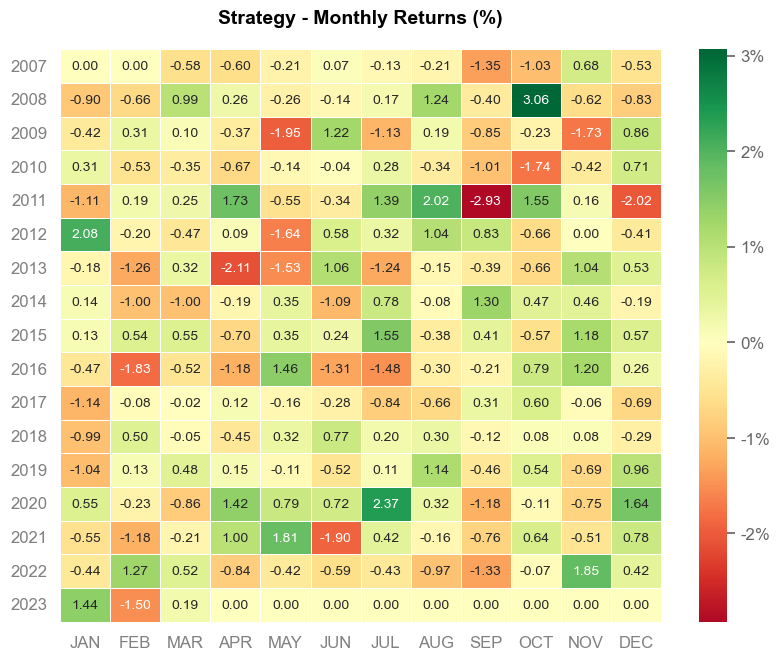

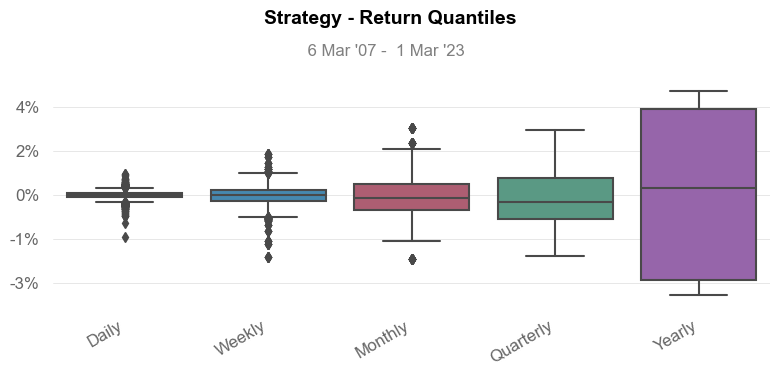

In [51]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change().resample('D').last().dropna())